# Cíl
Cílem tohoto cvičení je vytvoření vlastní neuronové sítě, která bude určovat, co vidí 4 pixelová kamera.
Jedná se o aplikaci, která byla představena v přednášce.

Na vstupu budou hodnoty 4 pixelů. 
- Hodnota -1 představuje zcela černou barvu
- Hodnota +1 představuje zcela bílou barvu
- Hodnoty mezi nimi poměrnou šedivou barvu

Pixely jsou sice zadány v řadě, ale geometricky jsou umístěny následovně.
- 1 2
- 3 4

Neuronová síť má vracet informaci, zda je pixely na obrázku představují
- jednolitou barvu (solid) - všechny pixely mají přibližně stejnou barvu
- svislé čáry (vertical) - jedna čára je bílá, druhá černá, v libovolném pořadí
- šikmé čáry (diagonal) - na obrázku jsou dvě diagonální čáry, jedna bílá, druhá černá
- vodorovné (horizontal) - na obrázku je jedna vodorovná bílá a druhá vodorovná černá čára

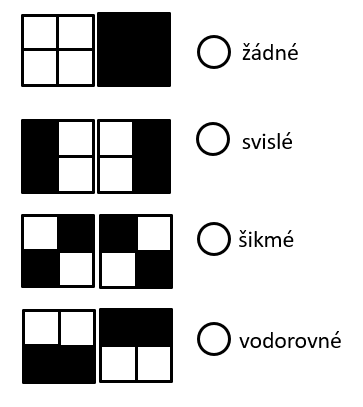

Do jednotlivých bloků doplňte potřebný zdrojový kód.

In [269]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Activation
from keras.models import Sequential

# Načtení dat

In [270]:
# načtení dat z CSV
data = pd.read_csv ("../dataset/camera.csv", sep=";", decimal=",")

# Popis dat
- Zobrazení vzorku dat
- Základní statistická charakteristika
- Distribuce hodnot

In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pixel1      16000 non-null  float64
 1   pixel2      16000 non-null  float64
 2   pixel3      16000 non-null  float64
 3   pixel4      16000 non-null  float64
 4   solid       16000 non-null  int64  
 5   vertical    16000 non-null  int64  
 6   diagonal    16000 non-null  int64  
 7   horizontal  16000 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 1000.1 KB


In [272]:
data.head(10)

,pixel1,pixel2,pixel3,pixel4,solid,vertical,diagonal,horizontal
0,0.242848,0.315426,0.225074,0.441009,1,0,0,0
1,0.212298,0.985880,0.700295,0.262448,1,0,0,0
2,0.259762,0.692340,0.393549,0.711056,1,0,0,0
3,0.733063,0.977552,0.327758,0.213178,1,0,0,0
4,0.251985,0.287715,0.693281,0.211018,1,0,0,0
5,0.617191,0.574164,0.359107,0.292843,1,0,0,0
6,0.455916,0.479482,0.986015,0.410571,1,0,0,0
7,0.256517,0.782238,0.307509,0.240088,1,0,0,0
8,0.860223,0.343808,0.932677,0.894632,1,0,0,0
9,0.958919,0.280654,0.383002,0.828005,1,0,0,0


In [273]:
data.describe()

,pixel1,pixel2,pixel3,pixel4,solid,vertical,diagonal,horizontal
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,-0.004084,-0.004718,-0.004395,0.000736,0.250000,0.250000,0.250000,0.250000
std,0.647283,0.643478,0.641570,0.645820,0.433026,0.433026,0.433026,0.433026
min,-0.999931,-0.999932,-0.999923,-0.999865,0.000000,0.000000,0.000000,0.000000
25%,-0.614454,-0.608144,-0.604348,-0.604686,0.000000,0.000000,0.000000,0.000000
50%,0.000048,0.000014,0.000028,0.000066,0.000000,0.000000,0.000000,0.000000
75%,0.598600,0.592761,0.590653,0.603468,0.250000,0.250000,0.250000,0.250000
max,0.999935,0.999997,0.999973,0.999987,1.000000,1.000000,1.000000,1.000000


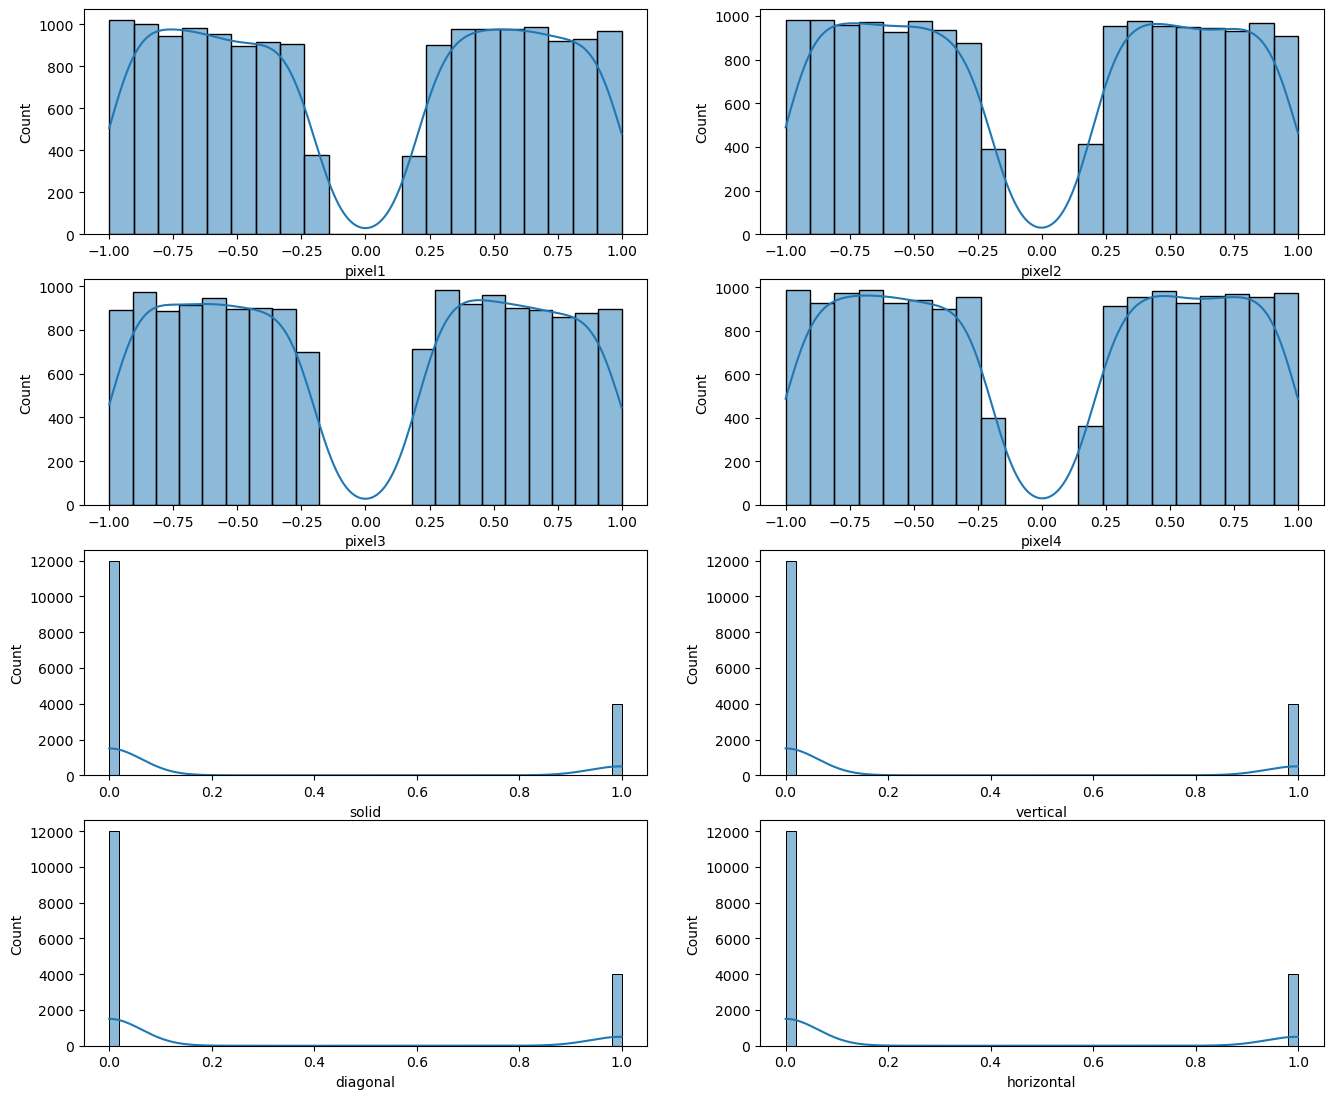

In [274]:
pos = 1
fig = plt.figure(figsize=(16,24))
for i in data.columns:
    ax = fig.add_subplot(7,2, pos)
    pos = pos + 1
    sns.histplot(data[i], ax=ax, kde=True)

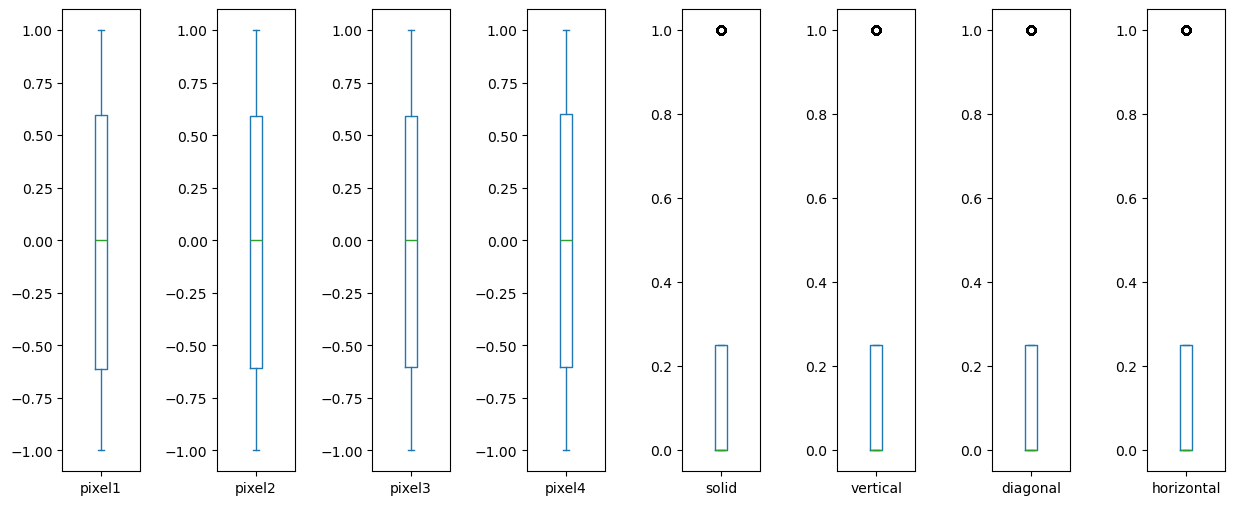

In [275]:
data.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 6)
)
plt.subplots_adjust(wspace=1) 
plt.show()

In [276]:
corr=data.corr()
corr

,pixel1,pixel2,pixel3,pixel4,solid,vertical,diagonal,horizontal
pixel1,1.000000,-0.000378,0.004118,-0.004130,0.003690,-0.002459,0.000613,-0.001844
pixel2,-0.000378,1.000000,-0.001622,-0.004991,-0.007110,-0.000954,0.006254,0.001810
pixel3,0.004118,-0.001622,1.000000,0.003538,0.003888,0.000840,0.004603,-0.009332
pixel4,-0.004130,-0.004991,0.003538,1.000000,-0.001286,0.006531,-0.002209,-0.003036
solid,0.003690,-0.007110,0.003888,-0.001286,1.000000,-0.333333,-0.333333,-0.333333
vertical,-0.002459,-0.000954,0.000840,0.006531,-0.333333,1.000000,-0.333333,-0.333333
diagonal,0.000613,0.006254,0.004603,-0.002209,-0.333333,-0.333333,1.000000,-0.333333
horizontal,-0.001844,0.001810,-0.009332,-0.003036,-0.333333,-0.333333,-0.333333,1.000000


<Axes: >

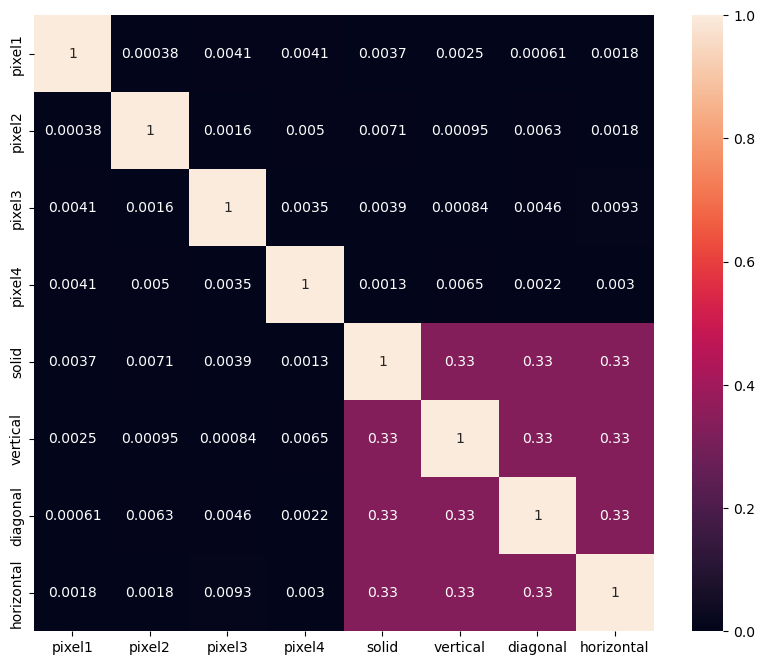

In [277]:
plt.figure(figsize = (10,8))
sns.heatmap(corr.abs(), annot=True, vmin=0, vmax=1)

In [278]:
print (data.isnull().sum())

pixel1        0
pixel2        0
pixel3        0
pixel4        0
solid         0
vertical      0
diagonal      0
horizontal    0
dtype: int64


# Rozdělení dat na vstupní a výstupní (X, Y)

In [279]:
X = pd.DataFrame(X, columns=['pixel1', 'pixel2', 'pixel3', 'pixel4'])
Y = pd.DataFrame(Y, columns=['solid', 'vertical', 'diagonal', 'horizontal'])

In [280]:
X.describe()

,pixel1,pixel2,pixel3,pixel4
count,1.600000e+04,16000.000000,16000.000000,16000.000000
mean,-1.421085e-17,0.000000,0.000000,0.000000
std,1.000031e+00,1.000031,1.000031,1.000031
min,-1.538551e+00,-1.546664,-1.551755,-1.549399
25%,-9.430019e-01,-0.937786,-0.935163,-0.937477
50%,6.384738e-03,0.007354,0.006894,-0.001038
75%,9.311274e-01,0.928543,0.927518,0.933310
max,1.551178e+00,1.561430,1.565535,1.547307


In [281]:
X.head()

,pixel1,pixel2,pixel3,pixel4
0,0.381502,0.497536,0.357680,0.681748
1,0.334303,1.539490,1.098419,0.405252
2,0.407635,1.083299,0.620287,1.099907
3,1.138870,1.526548,0.517737,0.328960
4,0.395618,0.454471,1.087487,0.325614


In [282]:
Y.describe()

,solid,vertical,diagonal,horizontal
count,16000.000000,16000.000000,16000.000000,16000.000000
mean,0.250000,0.250000,0.250000,0.250000
std,0.433026,0.433026,0.433026,0.433026
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.250000,0.250000,0.250000,0.250000
max,1.000000,1.000000,1.000000,1.000000


In [283]:
Y.head()

,solid,vertical,diagonal,horizontal
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


# Standardizace dat

In [284]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [285]:
import joblib
joblib.dump(sc, 'std_scaler_task.bin', compress=True)
sc=joblib.load('std_scaler_task.bin')

# Rozdělení dat na trénovací, testovací a validační

In [286]:
from sklearn.model_selection import train_test_split
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1 - train_ratio)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(X_train.shape)
print (X_val.shape)
print (X_test.shape)

(12000, 4)
(2400, 4)
(1600, 4)


# Neuronová síť
- Struktura
  - Vstupní vrstva
  - Skrytá vrstva - 4 neurony, aktivační funkce tanh
  - Skrytá vrstva - 4 neurony, aktivační funkce tanh
  - Skrytá vrstva - 8 neurony, aktivační funkce relu
  - Výstupní vrstva - aktivační funkce linear
- compile (optimizer="adam", loss="mse")
- summary 
- vytrénování sítě

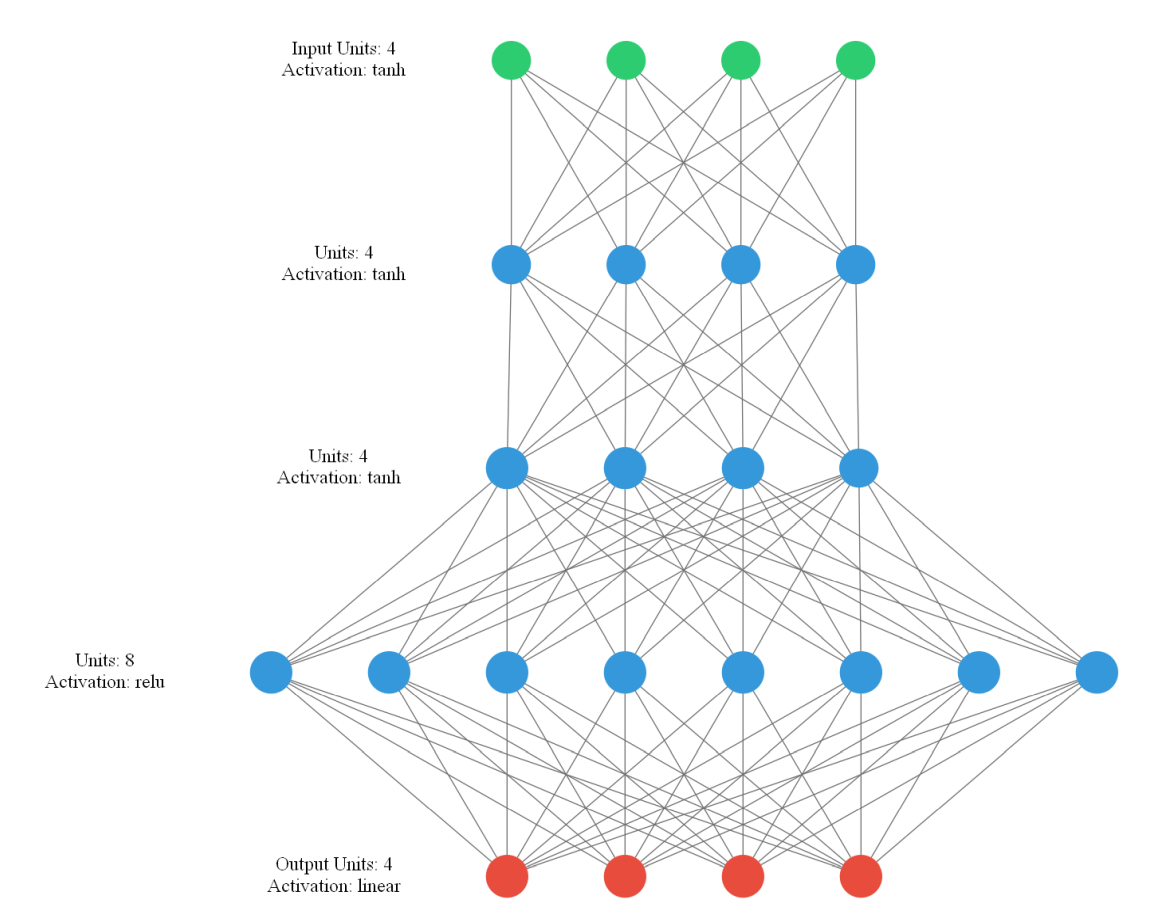

# Struktura síťe

In [287]:
import keras
from keras.layers import Dense, Activation, Input
from keras.models import Sequential

In [288]:
model = Sequential()
model.add(Input(shape=(4,))) 

In [289]:
model.add(Dense(128, activation = 'relu', input_dim = 4))

/opt/anaconda3/envs/cvika_ver9/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [290]:
model.add(Dense(64, activation  = 'relu'))

In [291]:
model.add(Dense(32, activation  = 'relu'))

In [292]:
model.add(Dense(16, activation  = 'linear'))

In [293]:
model.add(Dense(4, activation='softmax'))

# Nastavení parametrů učení

In [294]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [295]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,572 (45.20 KB)

 Trainable params: 11,572 (45.20 KB)

 Non-trainable params: 0 (0.00 B)

In [296]:
from keras_visualizer import visualizer 
visualizer(model, file_format='png', view=True)

# Učení

In [297]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
history=model.fit(X_train, Y_train, epochs = 100, batch_size=5, validation_data=(X_val, Y_val), callbacks=[early_stop])

Epoch 1/100
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 2s 490us/step - accuracy: 0.9764 - loss: 0.1476 - val_accuracy: 1.0000 - val_loss: 5.8256e-05
Epoch 2/100
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - accuracy: 1.0000 - loss: 3.4292e-05 - val_accuracy: 1.0000 - val_loss: 8.8027e-06
Epoch 3/100
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 1.0000 - loss: 5.7803e-06 - val_accuracy: 1.0000 - val_loss: 2.0521e-06
Epoch 4/100
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - accuracy: 1.0000 - loss: 1.3594e-06 - val_accuracy: 1.0000 - val_loss: 4.7604e-07
Epoch 5/100
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step - accuracy: 1.0000 - loss: 3.0247e-07 - val_accuracy: 1.0000 - val_loss: 1.3227e-07
Epoch 6/100
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 1.0000 - loss: 9.2326e-08 - val_accuracy: 1.0000 - val_loss: 3.7154e-08
Epoch 7/100
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 1s 460us/step - accuracy: 1.0000 - loss: 2.4801e-08 - val_accuracy: 1.0000 - val_loss: 1.0431e-08
Epoch 8/100
2400/

# Hodnocení modelu

In [306]:
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_true = np.argmax(Y_test.values, axis=1)
y_pred = np.argmax(Y_pred, axis=1)

print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification report:\n", classification_report(y_true, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_true, y_pred))

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
Accuracy: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       416
           1       1.00      1.00      1.00       389
           2       1.00      1.00      1.00       405
           3       1.00      1.00      1.00       390

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600


Confusion matrix:
 [[416   0   0   0]
 [  0 389   0   0]
 [  0   0 405   0]
 [  0   0   0 390]]


# Histori učení
Zobrazení křivky historie učení

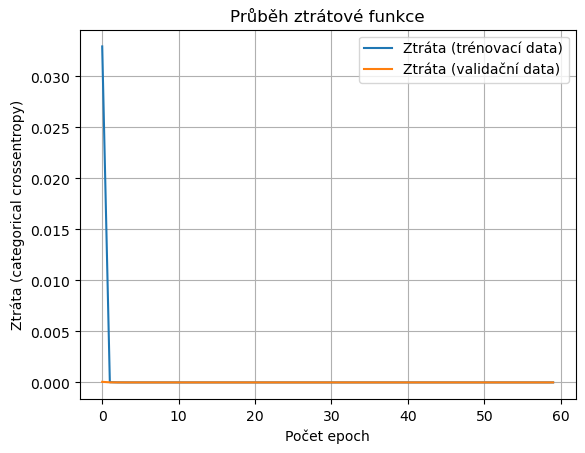

In [307]:
plt.plot(history.history['loss'], label='Ztráta (trénovací data)')
plt.plot(history.history['val_loss'], label='Ztráta (validační data)')
plt.title('Průběh ztrátové funkce')
plt.xlabel('Počet epoch')
plt.ylabel('Ztráta (categorical crossentropy)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


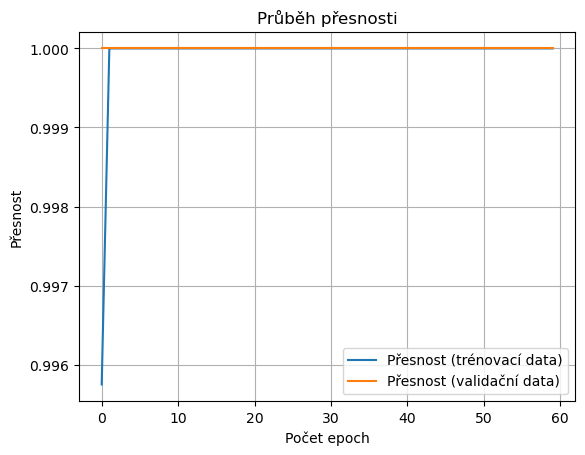

In [308]:
plt.plot(history.history['accuracy'], label='Přesnost (trénovací data)')
plt.plot(history.history['val_accuracy'], label='Přesnost (validační data)')
plt.title('Průběh přesnosti')
plt.xlabel('Počet epoch')
plt.ylabel('Přesnost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [309]:
model.save('model_task.keras')

In [310]:
sc=joblib.load('std_scaler_task.bin')

# Ověření na vlastních datech

In [311]:
data = np.array([-1, 1, -1, 1])
data = data.reshape(1, -1)
data = sc.transform(data)

Y_pred = model.predict(data)

classes = ['solid', 'vertical', 'diagonal', 'horizontal']
print("Odpověď sítě (softmax):", Y_pred)
print("Predikovaná třída:", classes[np.argmax(Y_pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Odpověď sítě (softmax): [[8.6443625e-20 1.0000000e+00 5.1187455e-27 7.4891815e-20]]
Predikovaná třída: vertical


/opt/anaconda3/envs/cvika_ver9/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
